In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [43]:
!wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv

--2023-10-01 17:43:33--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv.2’

data.csv.2          100%[===================>]   1.41M  --.-KB/s    in 0.09s   

2023-10-01 17:43:33 (15.6 MB/s) - ‘data.csv.2’ saved [1475504/1475504]



In [44]:
path = "/content/data.csv"

In [45]:
select_cols = ["Make","Model","Year","Engine HP","Engine Cylinders","Transmission Type","Vehicle Style","highway MPG","city mpg","MSRP"]

In [46]:
df = pd.read_csv(path,usecols=select_cols)

In [47]:
df.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


**Data Preparation**

In [48]:
df.isnull().sum()

Make                  0
Model                 0
Year                  0
Engine HP            69
Engine Cylinders     30
Transmission Type     0
Vehicle Style         0
highway MPG           0
city mpg              0
MSRP                  0
dtype: int64

In [49]:
#removing null values
df = df.fillna(0)

In [50]:
df.isnull().sum()

Make                 0
Model                0
Year                 0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Vehicle Style        0
highway MPG          0
city mpg             0
MSRP                 0
dtype: int64

In [51]:
#Rename MSRP variable to price.

df.rename(columns={'MSRP': 'price'}, inplace=True)

In [52]:
df.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


**Question 1**

In [53]:
df['Transmission Type'].mode()

0    AUTOMATIC
Name: Transmission Type, dtype: object

Auomatic

**Question 2 (Correlation Calculation)**

In [54]:
data_numeric = df.copy()
data_numeric = df.select_dtypes(include=['number'])

In [55]:
data_numeric.describe()

,Year,Engine HP,Engine Cylinders,highway MPG,city mpg,price
count,11914.000000,11914.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,247.941749,5.614655,26.637485,19.733255,4.059474e+04
std,7.579740,110.507669,1.800554,8.863001,8.987798,6.010910e+04
min,1990.000000,0.000000,0.000000,12.000000,7.000000,2.000000e+03
25%,2007.000000,170.000000,4.000000,22.000000,16.000000,2.100000e+04
50%,2015.000000,225.000000,6.000000,26.000000,18.000000,2.999500e+04
75%,2016.000000,300.000000,6.000000,30.000000,22.000000,4.223125e+04
max,2017.000000,1001.000000,16.000000,354.000000,137.000000,2.065902e+06


In [56]:
data_numeric.corr()

,Year,Engine HP,Engine Cylinders,highway MPG,city mpg,price
Year,1.000000,0.338714,-0.040708,0.258240,0.198171,0.227590
Engine HP,0.338714,1.000000,0.774851,-0.415707,-0.424918,0.650095
Engine Cylinders,-0.040708,0.774851,1.000000,-0.614541,-0.587306,0.526274
highway MPG,0.258240,-0.415707,-0.614541,1.000000,0.886829,-0.160043
city mpg,0.198171,-0.424918,-0.587306,0.886829,1.000000,-0.157676
price,0.227590,0.650095,0.526274,-0.160043,-0.157676,1.000000


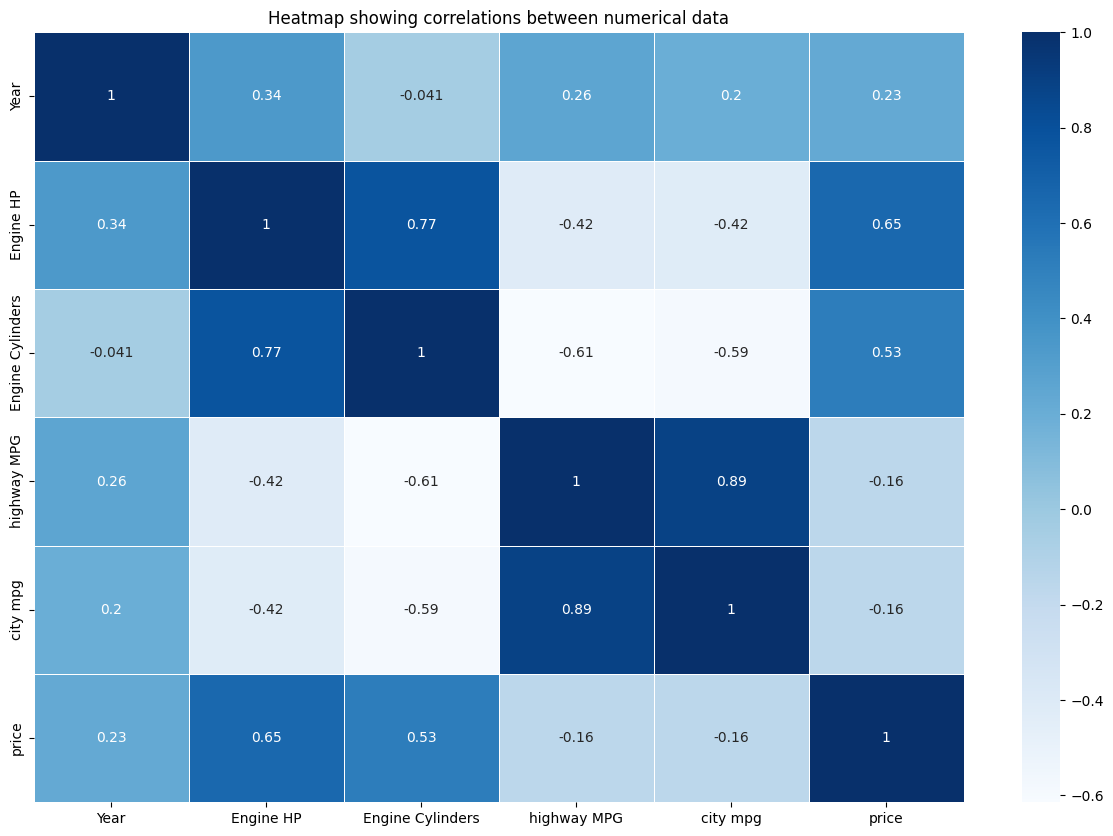

In [57]:
plt.figure(figsize=(15,10))
sns.heatmap(data_numeric.corr(),annot=True,linewidths=.5, cmap="Blues")
plt.title('Heatmap showing correlations between numerical data')
plt.show()

In [58]:
data_numeric.corr().unstack().sort_values(ascending = False)[:15]

Year              Year                1.000000
Engine HP         Engine HP           1.000000
city mpg          city mpg            1.000000
highway MPG       highway MPG         1.000000
Engine Cylinders  Engine Cylinders    1.000000
price             price               1.000000
city mpg          highway MPG         0.886829
highway MPG       city mpg            0.886829
Engine HP         Engine Cylinders    0.774851
Engine Cylinders  Engine HP           0.774851
price             Engine HP           0.650095
Engine HP         price               0.650095
Engine Cylinders  price               0.526274
price             Engine Cylinders    0.526274
Engine HP         Year                0.338714
dtype: float64

Answer **city mpg highway MPG **

In [59]:
#@ PROCESSING DATASET:
data_class = df.copy()
mean = data_class['price'].mean()

In [60]:
mean

40594.737032063116

In [61]:
data_class['above_average'] = np.where(data_class['price']>=mean,1,0)

In [62]:
df_train_full, df_test = train_test_split(data_class, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

In [63]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [64]:
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

In [65]:
df.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


**Question No 3**

In [66]:
from sklearn.metrics import mutual_info_score
#@ PREPARING DATASET:
cat = ["Make","Model","Transmission Type","Vehicle Style"]

#@ DEFINING FUNCTION:
def calculate_mi(series):
    return mutual_info_score(series, df_train.above_average)

#@ IMPLEMENTATION:
df_mi = df_train[cat].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')
print(round(df_mi,2))

                     MI
Model              0.46
Make               0.24
Vehicle Style      0.08
Transmission Type  0.02


Answer no 3
Vehicle Style	0.02

In [67]:
#@ PREPARING THE DATASET:
df_train = df_train.drop('above_average', axis=1)
df_val = df_val.drop('above_average', axis=1)
df_test = df_test.drop('above_average', axis=1)

**Question No 4**

In [68]:
num = ["Year", "Engine HP", "Engine Cylinders", "highway MPG", "city mpg", "price"]
train_dict = df_train[cat+num].to_dict(orient='records')

In [69]:
#@ VECTORIZING THE DATASET:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)
X_train = dv.transform(train_dict)

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [71]:
#@ TRAINING LOGISTIC REGRESSSION MODEL:
model = LogisticRegression(solver="liblinear", C=10, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [72]:
#@ INITIALIZING THE MODEL PREDICTION:
val_dict = df_val[cat + num].to_dict(orient='records')
X_val = dv.transform(val_dict)
y_pred = model.predict(X_val)

In [73]:
#@ INSPECTING THE ACCURACY:
accuracy = np.round(accuracy_score(y_val, y_pred),2)
print(accuracy)

1.0


- Answer for Question4: ~= 1.0

**Feature Elimination**

In [74]:
#@ INITIALIZING FEATURES:
features = cat + num
features

['Make',
 'Model',
 'Transmission Type',
 'Vehicle Style',
 'Year',
 'Engine HP',
 'Engine Cylinders',
 'highway MPG',
 'city mpg',
 'price']

In [75]:
#@ INSPECTING THE DIFFERENCE IN ACCURACY:
orig_score = accuracy

for c in features:
    subset = features.copy()
    subset.remove(c)

    train_dict = df_train[subset].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    dv.fit(train_dict)

    X_train = dv.transform(train_dict)

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    val_dict = df_val[subset].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    y_pred = model.predict(X_val)

    score = accuracy_score(y_val, y_pred)
    print(c, orig_score - score, score)

Make 0.00041963911036513313 0.9995803608896349
Model 0.00041963911036513313 0.9995803608896349
Transmission Type 0.00041963911036513313 0.9995803608896349
Vehicle Style 0.00041963911036513313 0.9995803608896349
Year 0.0545530843474612 0.9454469156525388
Engine HP 0.0 1.0
Engine Cylinders 0.00041963911036513313 0.9995803608896349
highway MPG 0.00041963911036513313 0.9995803608896349
city mpg 0.00041963911036513313 0.9995803608896349
price 0.063365505665128 0.936634494334872


Answer qno 4 is Engine Hp

**Qno 6**

In [76]:
df['price']=np.log1p(df['price'])

In [77]:
#@ SPLITTING THE DATASET:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

In [78]:
#@ PREPARING THE DATASET:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [79]:
#@ PREPARING THE DATASET:
y_train = df_train.price.values
y_val = df_val.price.values
y_test = df_test.price.values

In [80]:
#@ PREPARING THE DATASET:
train_dict = df_train[cat + num].to_dict(orient='records')

In [81]:
#@ VECTORIZING THE DATASET:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)

val_dict = df_val[cat + num].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [82]:
#@ RIDGE REGRESSION IMPLEMENTATION:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
for a in [0, 0.01, 0.1, 1, 10]:
    model = Ridge(alpha=a, solver="sag", random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)

    score = np.sqrt(mean_squared_error(y_val, y_pred))

    print(a, round(score, 4))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0 0.0294


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.01 0.0294


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.1 0.0295


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


1 0.0296
10 0.0309


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


answer = 0
